In [2]:
!pip -q install opencv-python==4.11.0.86

    kubernetes (>=9.0.0a1.0) ; extra == 'all_extras'
               ~~~~~~~~~~^


In [19]:
from pystac_client import Client
import geopandas as gpd
import xarray as xr
import folium
from odc.geo import Geometry
from odc.stac import load
import util

In [20]:
catalog = "https://stac.digitalearthpacific.org"
client = Client.open(catalog)

In [21]:
year = "2024"
aoi = Geometry(gpd.read_file("priority_1_sites/Ambae.geojson").geometry[0], crs="EPSG:4326")
aoi.explore()

In [22]:
items = list(
    client.search(collections=["dep_s2_ammi"], datetime=year, intersects=aoi).items()
)

print(f"Found {len(items)} items")

Found 2 items


In [24]:
data = load(
    items,
    intersects=aoi,
    resolution=10,
    chunks={"x": 2048, "y": 2048},
    grouby="solar_day",
)

In [30]:
data.mangroves

<xarray.DataArray 'mangroves' (time: 1, y: 3903, x: 5381)> Size: 21MB
dask.array<mangroves, shape=(1, 3903, 5381), dtype=uint8, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 31kB -1.798e+06 -1.798e+06 ... -1.837e+06
  * x            (x) float64 43kB 1.987e+06 1.987e+06 ... 2.041e+06 2.041e+06
    spatial_ref  int32 4B 3832
  * time         (time) datetime64[ns] 8B 2024-01-01
Attributes:
    nodata:   255.0

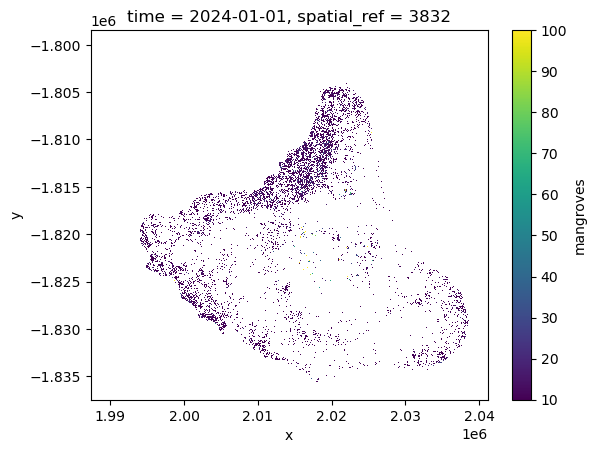

In [16]:
data["mangroves"].plot()

In [34]:
# Mangrove Mask and Density
data["mangroves"].odc.explore(cmap="viridis", name="AMMI")


### Export

In [15]:
# data["mangroves"].odc.write_cog(f"output_{year}.tif", overwrite=True)

PosixPath('output_2024.tif')